In [1]:
%matplotlib inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import requests 
from mpl_toolkits.mplot3d import Axes3D
import io

In [2]:
# re_unemp = pd.read_csv('data/Florida.csv')
url = "https://corona-2020-bucket.s3.us-east-2.amazonaws.com/new_Florida.csv"
request = requests.get(url).content
# print(requests.get(url).content)

re_unemp=pd.read_csv(io.StringIO(request.decode('utf-8')))
# test.head()


re_unemp.head(5)

,Year,Period,employment,unemployment,unemployment rate,single_home_avg_prices,is_covid
0,2010,Jan,8063166,1024439,11.3,123681.0900,0
1,2010,Feb,8097244,1024577,11.2,122934.1721,0
2,2010,Mar,8133092,1020729,11.2,122396.0270,0
3,2010,Apr,8165997,1015291,11.1,121774.3708,0
4,2010,May,8193577,1009635,11.0,121170.3348,0


In [3]:
X = re_unemp[["employment", "unemployment", "is_covid"]]
y = re_unemp["single_home_avg_prices"].values.reshape(-1, 1)
print(X.shape, y.shape)

(125, 3) (125, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84)


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.893696858478269
Testing Score: 0.89825873315741


Text(0.5, 1.0, 'Residual Plot')

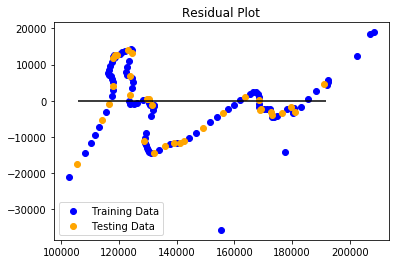

In [7]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")